In [1]:
from synthetic_data import *
from projected_gradient_descent import *
from alternative_minimization import *
from logdet import *
from performance_eval import *

## Synthetic Data

In [2]:
n, p = 5, 1000
L_orig, X = make_data(n=n, p=p)

## Alternative Minimization (Primal formulation for $L$)

primal value is 43.44147230227332
iteration-0: obj value = 42.81607403773252
primal value is 42.19607905898163
iteration-1: obj value = 42.80838150126576
primal value is 42.18125163639881
iteration-2: obj value = 42.808182520355935
primal value is 42.17937059216179
iteration-3: obj value = 42.808203398727755


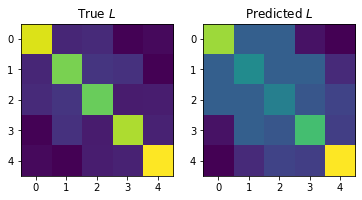

In [3]:
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 10

L_opt, Y_opt = alternative_minimization(X, alpha=alpha, beta=beta, num_iters=num_iters, dual=False)
visualise_L(L_orig, L_opt)

## Alternative Minimization (Dual formulation for $L$)

dual value is 43.441504650746865
iteration-0: obj value = 42.816136376148734
dual value is 42.19632533837355
iteration-1: obj value = 42.808356211965766
dual value is 42.181294079431744
iteration-2: obj value = 42.80823213244126
dual value is 42.17938906313263
iteration-3: obj value = 42.80823010086517


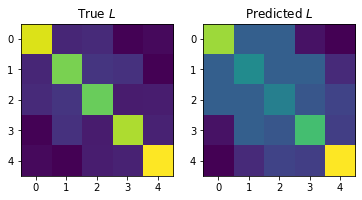

In [4]:
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 10

L_opt, Y_opt = alternative_minimization(X, alpha=alpha, beta=beta, num_iters=num_iters, dual=True)
visualise_L(L_orig, L_opt)

## Projected Gradient Descent

final objective value = 42.808562841124065
final objective value = 42.808856042425546
final objective value = 42.80857537652894
final objective value = 42.808856262780935
final objective value = 42.808410703318216
final objective value = 42.80885641230722
final objective value = 42.8079115123616
final objective value = 42.80885601867629
final objective value = 42.807972844471166
final objective value = 42.80810158885568


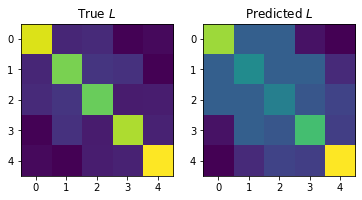

In [5]:
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 1000
eta_L = 0.5
eta_Y = 0.5
    
num_inits = 10
objective_values = np.zeros((num_inits))
L_opt_values = np.zeros((n, n, num_inits))
Y_opt_values = np.zeros((n, p, num_inits))

for idx_init in range(num_inits):

    L_init = project_L(np.random.rand(n,n))

    ret_tuple = proj_grad_descent(X, alpha=alpha, beta=beta, L_init=L_init, 
                                  num_iters=num_iters, eta_L=eta_L, eta_Y=eta_Y)
   
    L_opt_values[:, :, idx_init] = ret_tuple[0]
    Y_opt_values[:, :, idx_init] = ret_tuple[1]
    objective_values[idx_init] = ret_tuple[2]

idx_init_best = np.argmin(objective_values)
L_opt = L_opt_values[:, :, idx_init_best]
Y_opt = Y_opt_values[:, :, idx_init_best]
visualise_L(L_orig, L_opt)

## Method for comparison

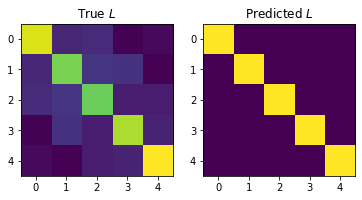

In [6]:
lam = 1e1
L_opt = logdet(X, lam)
visualise_L(L_orig, L_opt)